## QLIPP CALIBRATION NOTEBOOK

In [1]:
import time
import os, sys
from pycromanager import Bridge

p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
import numpy as np
from recOrder.recOrder.calib.Calibration import QLIPP_Calibration
from recOrder.recOrder.calib.CoreFunctions import snap_image

In [2]:
bridge = Bridge(convert_camel_case=False)
mmc = bridge.get_core()
mm = bridge.get_studio()

calib = QLIPP_Calibration()
calib.mmc = mmc
calib.mm = mm
calib.print_details = True

### Notes Before you begin:

* Choose a field of view with no sample for calibration
* Decide whether you want a 4-State Scheme (faster) or a 5-State Scheme (slower, slightly more sensitive?)

Will Calibrate Using this ROI:


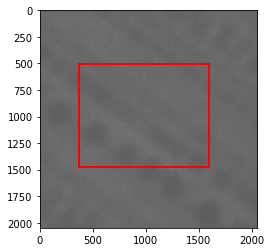

Would You Like to Calibrate Using this ROI? (Yes/No): 	y
Calculating Blacklevel ...
Blacklevel: 102.64818401206637

Calibrating State0 (Extinction)...

Starting first grid search, step = 0.1
update (528.800280, 0.010000, 0.250000)
update (450.593286, 0.010000, 0.350000)
update (382.087024, 0.010000, 0.450000)
update (340.144729, 0.010000, 0.550000)
update (340.094652, 0.010000, 0.650000)
update (288.603098, 0.110000, 0.550000)
update (285.221674, 0.110000, 0.650000)
update (265.396396, 0.210000, 0.450000)
update (173.095508, 0.210000, 0.550000)
update (158.706272, 0.210000, 0.650000)
update (129.258944, 0.310000, 0.550000)
update (108.761659, 0.310000, 0.650000)
coarse search done
better lca = 0.31000000000000005
better lcb = 0.6499999999999999
better int = 108.76165912518854
grid search done
lca = 0.31000000000000005
lcb = 0.6499999999999999
intensity = 108.76165912518854

Starting fine search
	Optimize lca ...
	lca = 0.3193
	lcb = 0.6500
	Intensity = 108.37328305681247
	Intensity Dif

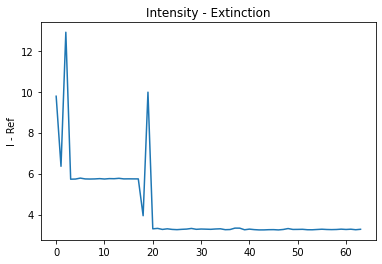

--------done--------


Calibrating State1 (I0)...
setting LCA = 0.2174
setting LCB = 0.5978


Intensity = 146.19345734875148
--------done--------

Calibrating State2 (I60)...
	Optimizing lca w/ constrained lcb ...
	lca = 0.3840
	lcb = 0.4783
	Intensity = 146.2628288922407
	Intensity Difference = 0.0474519%
setting LCA = 0.384
setting LCB = 0.4783


ratio: swing_LCB / swing_LCA = -1.7930 | target ratio: -1.793
total swing = 0.1368 | target = 0.10000000036258341


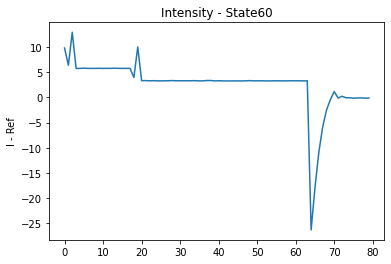

--------done--------

Calibrating State3 (I120)...

	Optimizing lca w/ constrained lcb ...
	lca = 0.3523
	lcb = 0.6604
	Intensity = 146.37325791855204
	Intensity Difference = 0.1229881%
setting LCA = 0.3523
setting LCB = 0.6604


ratio: swing_LCB / swing_LCA = 1.7930 | target ratio: 1.793
total swing = 0.0717 | target = 0.10000000036258341


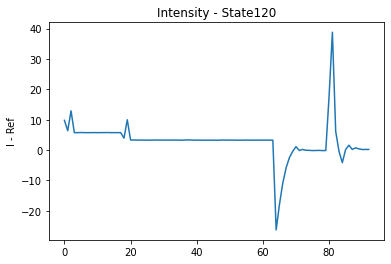

--------done--------

=======Finished Calibration=======

EXTINCTION = -4.587913021696171
Wall time: 28.5 s


In [3]:
%%time

calibration_scheme = '4-State Extinction'
# calibration_scheme = '5-State'
swing = 0.1
wavelength = 546
use_full_FOV = False
method = 'min_scalar'

meta_file_name = r'Q:\Cameron\Calibration_Testing\metadata_test.txt'

# Run Calibration
calib.run_calibration(calibration_scheme, options=(swing, wavelength, meta_file_name, method, use_full_FOV))

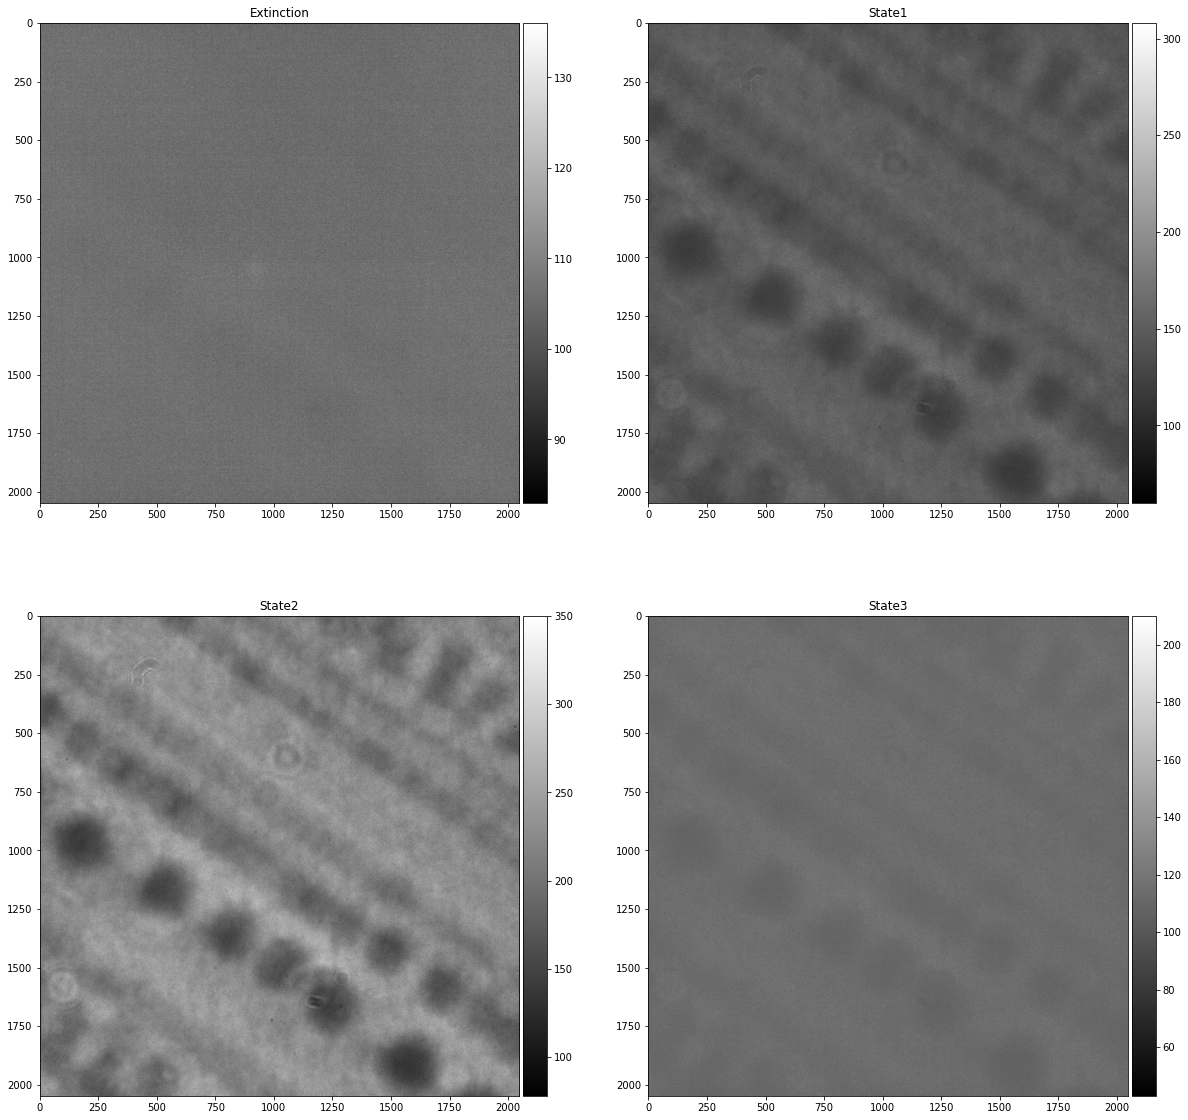

In [4]:
## Take set of BG Images

directory = r'Q:\Cameron\Calibration_Testing\BG'

n_avg = 20

if calibration_scheme == '5-State':
    calib.capture_bg(n_avg, 5, directory)

elif calibration_scheme == '4-State Extinction':
    calib.capture_bg(n_avg, 4, directory)